# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Busayo Olushola</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read csv
data = pd.read_csv("https://github.com/busgandy/Global-AI-Hub/blob/main/Lesson%205%20(13-11-20)/Project/data/churn.csv?raw=true")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
data["ContractRenewal"].unique()

array([1, 0])

In [4]:
data["DataPlan"].unique()

array([1, 0])

In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

In [8]:
# Our label Distribution (countplot)


Text(0.5, 0, 'Churn')

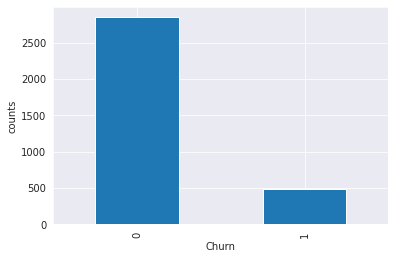

In [9]:
data["Churn"].value_counts().plot.bar()
plt.ylabel('counts')
plt.xlabel('Churn')

Text(0.5, 0, 'ContractRenewal')

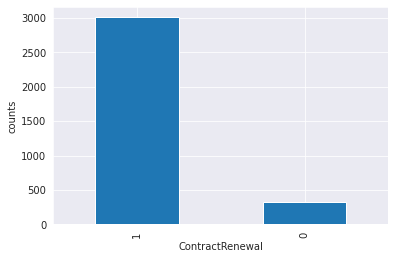

In [10]:
data["ContractRenewal"].value_counts().plot.bar()
plt.ylabel("counts")
plt.xlabel("ContractRenewal")

Text(0.5, 0, 'DataPlan')

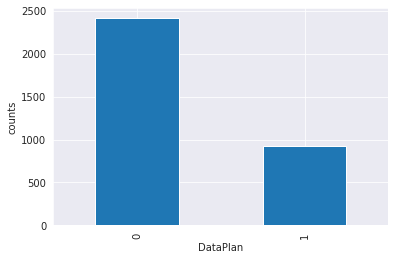

In [11]:
data["DataPlan"].value_counts().plot.bar()
plt.ylabel("counts")
plt.xlabel("DataPlan")

Text(0, 0.5, 'counts')

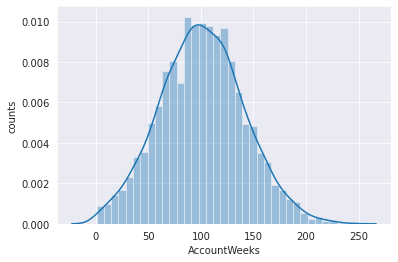

In [12]:
# Example EDA
sns.distplot(data["AccountWeeks"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

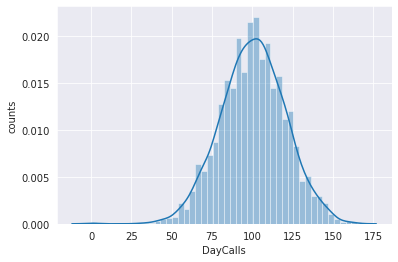

In [13]:
# Example EDA
sns.distplot(data["DayCalls"])
plt.ylabel("counts")

In [14]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [15]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

414

In [16]:
new_data = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_data)

# y_new = y[list(new_data["index"])]
# len(y_new)

,index,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
4,8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
2915,3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
2917,3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


In [17]:
new_data = new_data.drop('index', axis = 1)

In [18]:
display(new_data)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
4,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...
2914,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
2915,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
2917,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


Text(0, 0.5, 'counts')

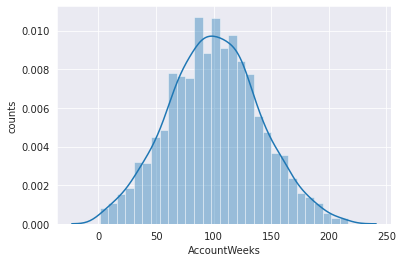

In [19]:
sns.distplot(new_data["AccountWeeks"])
plt.ylabel("counts")

Text(0, 0.5, 'counts')

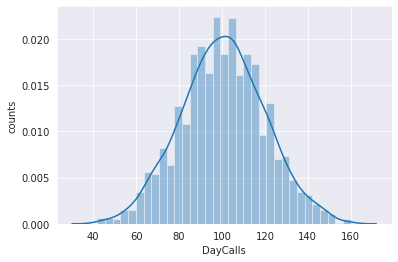

In [20]:
# Example EDA
sns.distplot(new_data["DayCalls"])
plt.ylabel("counts")

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

1.   **Are there any duplicated values?**

In [21]:
# Check for duplicated values
new_data.duplicated().sum()

0

No, there are no Duplicated values in the dataset

In [22]:
new_data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

2.   **Do we need to do feature scaling?**



Yes, we need feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
std = StandardScaler()

In [25]:
df = std.fit_transform(new_data.drop(columns = ["Churn","ContractRenewal","DataPlan"]))

In [26]:
df

array([[ 0.69196206,  1.51796075, -0.42816428, ...,  2.05929645,
        -0.068431  , -0.0941079 ],
       [ 0.1624696 ,  2.31721315, -0.42816428, ...,  1.62161451,
        -0.10450144,  1.29308134],
       [ 0.9188874 , -0.64002073, -1.25585404, ..., -0.25416527,
        -1.59541298,  0.73070732],
       ...,
       [-0.82087355, -0.36827492,  1.22721524, ...,  0.0209491 ,
        -0.95015288, -0.2440743 ],
       [-1.82943062, -0.64002073,  0.39952548, ..., -0.0040613 ,
         1.76314581,  1.44304774],
       [-0.66958999,  2.31721315, -1.25585404, ...,  2.74708237,
         1.30625356,  1.29308134]])

In [27]:
df1 = pd.DataFrame(columns = ('AccountWeeks','CustServCalls', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'), data =df)

In [28]:
df1.head()

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.691962,1.517961,-0.428164,1.603349,0.483568,2.059296,-0.068431,-0.094108
1,0.162470,2.317213,-0.428164,-0.332611,1.147964,1.621615,-0.104501,1.293081
2,0.918887,-0.640021,-1.255854,1.197452,0.687998,-0.254165,-1.595413,0.730707
3,0.515465,0.982462,1.227215,0.726088,-0.640795,1.953002,2.961486,-1.031398
4,0.414609,-0.488163,-0.428164,0.095732,-0.180828,0.489894,3.021603,-0.581499


In [29]:
df1["Churn"] = new_data["Churn"]

In [30]:
df1["ContractRenewal"] = new_data["ContractRenewal"]

In [31]:
df1["DataPlan"] = new_data["DataPlan"]

In [32]:
df1.head()

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn,ContractRenewal,DataPlan
0,0.691962,1.517961,-0.428164,1.603349,0.483568,2.059296,-0.068431,-0.094108,0,1,1
1,0.162470,2.317213,-0.428164,-0.332611,1.147964,1.621615,-0.104501,1.293081,0,1,1
2,0.918887,-0.640021,-1.255854,1.197452,0.687998,-0.254165,-1.595413,0.730707,0,1,0
3,0.515465,0.982462,1.227215,0.726088,-0.640795,1.953002,2.961486,-1.031398,0,1,1
4,0.414609,-0.488163,-0.428164,0.095732,-0.180828,0.489894,3.021603,-0.581499,0,1,0


3. **Do we need to generate new features?**



No, we do not need to generate new features

4.   **Split Train and Test dataset. (0.7/0.3)**



Splitting the dataset into 70% Train and 30% Test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Churn', axis=1), df1['Churn'], test_size=0.3, random_state=42)


In [35]:
X_test.shape

(876, 10)

In [36]:
y_train.shape

(2043,)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

**What is machine Learning Model?**

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.


In [37]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix

def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(data.drop(columns=['Churn']))


# Machine Learning

### Using Logistic Regression:

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log = LogisticRegression(solver="liblinear", C=10)

In [40]:
model_testing(log)

Training Accuracy:  0.8986784140969163 

Testing Accuracy:  0.8949771689497716 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       778
           1       0.69      0.11      0.19        98

    accuracy                           0.89       876
   macro avg       0.79      0.55      0.57       876
weighted avg       0.88      0.89      0.86       876



array([0, 0, 0, ..., 0, 0, 0])

In [41]:
log.intercept_

array([-1.32537244])

In [42]:
log.coef_

array([[-0.00901184, -0.05273569,  0.63092688,  1.25631552,  0.15499808,
        -0.61028224,  0.54711596,  0.14088729, -1.32537244, -0.34774713]])

In [43]:
log.predict_proba(X_train)

array([[0.81491176, 0.18508824],
       [0.89457612, 0.10542388],
       [0.87454106, 0.12545894],
       ...,
       [0.98249374, 0.01750626],
       [0.98067899, 0.01932101],
       [0.61991322, 0.38008678]])

In [44]:
confusion_matrix(y_train, log.predict(X_train))

array([[1806,   14],
       [ 193,   30]])

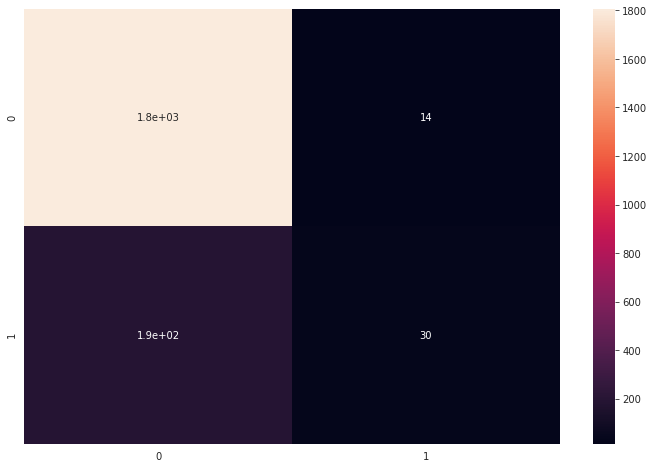

In [45]:
c_matrix = confusion_matrix(y_train, log.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(c_matrix, annot=True)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
gsc = GridSearchCV(estimator = log, param_grid  = {"C": [0.1,0.01,0.001,10,1]}, cv= 5)

In [48]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.01, 0.001, 10, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
gsc.best_params_

{'C': 10}

In [50]:
gsc.best_score_

0.8986828227623567

In [51]:
gsc.score(X_test, y_test)

0.8949771689497716

## Using Decision Trees


In [52]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4 , random_state=42)
dtc.fit(X_train,y_train)
print("Accuracy of train:",dtc.score(X_train, y_train))
print("Accuracy of test:",dtc.score(X_test,y_test))

Accuracy of train: 0.947136563876652
Accuracy of test: 0.9337899543378996


In [53]:
dtc_pred = dtc.predict(X_test)
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       778
           1       0.71      0.69      0.70        98

    accuracy                           0.93       876
   macro avg       0.83      0.83      0.83       876
weighted avg       0.93      0.93      0.93       876



In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score


print("Precision = {}".format(precision_score(y_test, dtc_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, dtc_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, dtc_pred)))
print("F1 Score = {}".format(f1_score(y_test, dtc_pred,average='macro')))

Precision = 0.8349358974358975
Recall = 0.8289439168983789
Accuracy = 0.9337899543378996
F1 Score = 0.8319018567288223


In [55]:
dtc.predict_proba(X_train)

array([[0.96528555, 0.03471445],
       [0.96528555, 0.03471445],
       [1.        , 0.        ],
       ...,
       [0.96528555, 0.03471445],
       [0.96528555, 0.03471445],
       [1.        , 0.        ]])

In [56]:
confusion_matrix(y_train, dtc.predict(X_train))

array([[1769,   51],
       [  57,  166]])

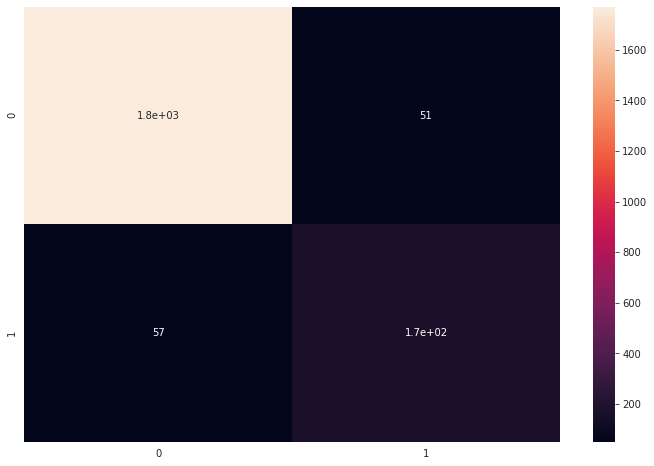

In [57]:
c_matrix = confusion_matrix(y_train, dtc.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(c_matrix, annot=True)

### Using Support Vector:

In [58]:
from sklearn.svm import SVC

In [59]:
svc = SVC(C=10)

In [60]:
model_testing(svc)

Training Accuracy:  0.9627998042094958 

Testing Accuracy:  0.9531963470319634 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       778
           1       0.89      0.66      0.76        98

    accuracy                           0.95       876
   macro avg       0.92      0.83      0.87       876
weighted avg       0.95      0.95      0.95       876



array([0, 0, 0, ..., 0, 0, 0])

### Using Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier(n_estimators=200)

In [63]:
model_testing(rfc)

Training Accuracy:  1.0 

Testing Accuracy:  0.9509132420091324 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       778
           1       0.87      0.66      0.75        98

    accuracy                           0.95       876
   macro avg       0.91      0.83      0.86       876
weighted avg       0.95      0.95      0.95       876



array([0, 0, 0, ..., 0, 0, 0])

In [64]:
rfc.predict_proba(X_train)

array([[0.99 , 0.01 ],
       [1.   , 0.   ],
       [0.95 , 0.05 ],
       ...,
       [0.99 , 0.01 ],
       [0.985, 0.015],
       [0.67 , 0.33 ]])

In [65]:
confusion_matrix(y_train, rfc.predict(X_train))

array([[1820,    0],
       [   0,  223]])

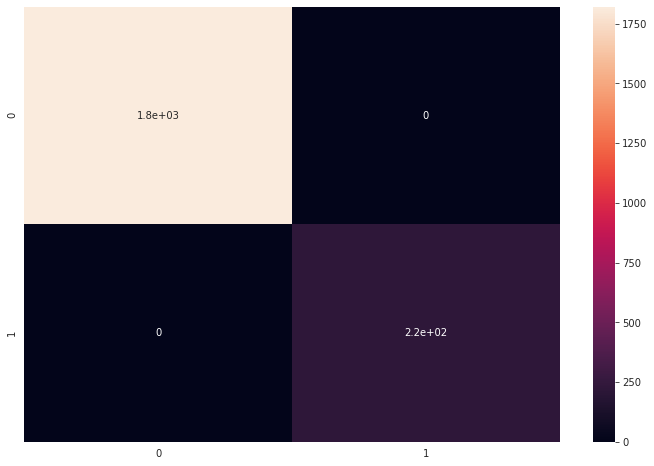

In [66]:
con_matrix = confusion_matrix(y_train, rfc.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(con_matrix, annot=True)

### Using KNearest Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()

In [69]:
model_testing(knn)

Training Accuracy:  0.9373470386686246 

Testing Accuracy:  0.930365296803653 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       778
           1       0.88      0.44      0.59        98

    accuracy                           0.93       876
   macro avg       0.91      0.72      0.77       876
weighted avg       0.93      0.93      0.92       876



array([0, 0, 0, ..., 0, 0, 0])

In [76]:
knn.predict_proba(X_train)

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4]])

In [77]:
confusion_matrix(y_train, knn.predict(X_train))

array([[1810,   10],
       [ 118,  105]])

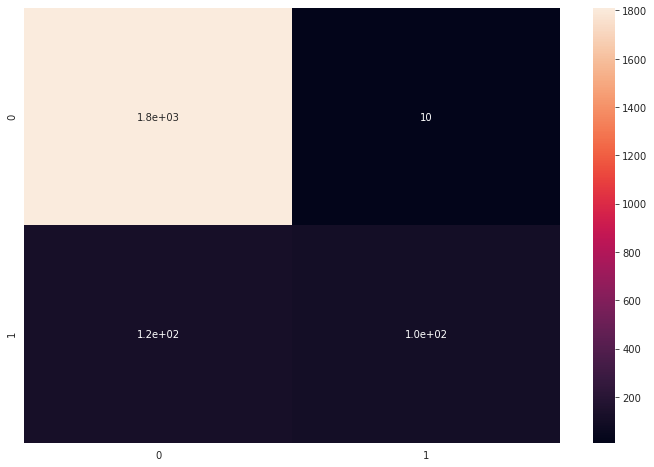

In [78]:
con_matrix = confusion_matrix(y_train, knn.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(con_matrix, annot=True)

## Using Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gbc = GradientBoostingClassifier()

In [72]:
model_testing(gbc)

Training Accuracy:  0.9745472344591287 

Testing Accuracy:  0.9509132420091324 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       778
           1       0.88      0.65      0.75        98

    accuracy                           0.95       876
   macro avg       0.92      0.82      0.86       876
weighted avg       0.95      0.95      0.95       876



array([1, 1, 0, ..., 0, 0, 1])

In [73]:
gbc.predict_proba(X_train)

array([[0.97727118, 0.02272882],
       [0.97534227, 0.02465773],
       [0.9894031 , 0.0105969 ],
       ...,
       [0.97554601, 0.02445399],
       [0.98751831, 0.01248169],
       [0.61065264, 0.38934736]])

In [74]:
confusion_matrix(y_train, gbc.predict(X_train))

array([[1813,    7],
       [  45,  178]])

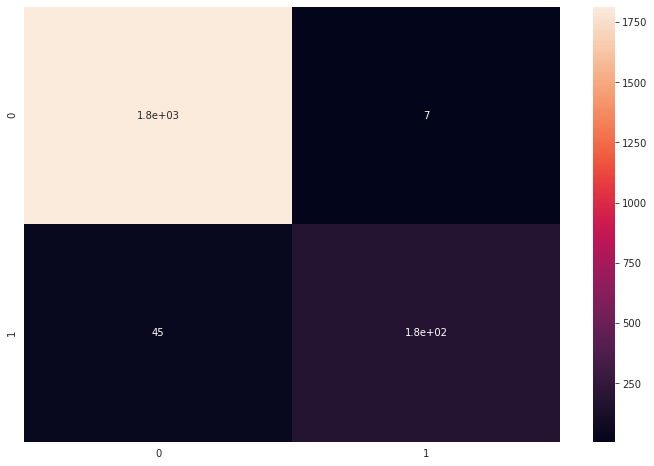

In [75]:
con_matrix = confusion_matrix(y_train, gbc.predict(X_train))
plt.figure(figsize=(12, 8))
sns.heatmap(con_matrix, annot=True)

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

The best performing model is **Random Forest** with:
1.   Training Accuracy:  1.0 
2.   Testing Accuracy:  0.9509132420091324

Hypertuning the model would improve it